In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

In [4]:
xs = np.arange(-5,5, 0.25)
ys = f(xs)
print(xs)
print(ys)

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
[100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


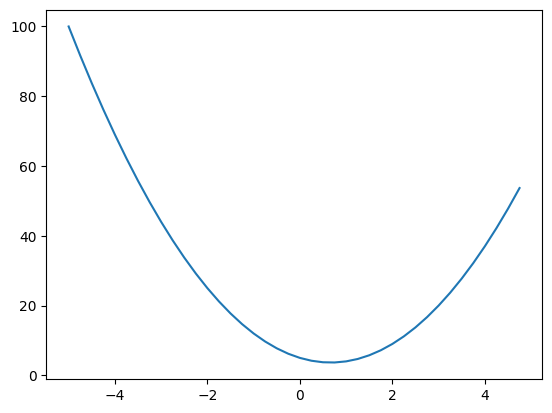

In [5]:
plt.plot(xs,ys)

if we nudge the value of x by a very small amount

In [6]:
h = 0.00001
x =3
f(x+h)

20.0001400003

the difference between actual x and x+h (after nudging)

In [7]:
f(x+h)-f(x)

0.0001400003000000538

normalizing by h to find the slope at that point

In [8]:
(f(x+h)-f(x))/h

14.00003000000538

In [9]:
#little complex example with 3 input variables
a = -2.0
b = 3.0
c = 10.0

d = a*b + c
d

4.0

when a is bumped by a small amount the resulting d is increased 3 times, hence the slope is 3 \
This is also the rate at which d will increase if we nudge 'a'

In [10]:
h = 0.0001

#inputs
a = -2.0
b = 3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1 ',d1)
print('d2 ',d2)
print('slope ', (d2-d1)/h)

d1  4.0
d2  4.0003
slope  3.00000000000189


In [11]:
class Value:
    def __init__(self,data,_children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self.grad = 0.0
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f'Value(data = {self.data})'
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other),'+')
        return out
        
    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other),'*')
        return out
        
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e+c; d.label='d'
f= Value(-2.0, label='f')
L = d*f; L.label='L'
 
        

In [12]:
d._prev

{Value(data = -6.0), Value(data = 10.0)}

In [13]:
d._op

'+'

In [14]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

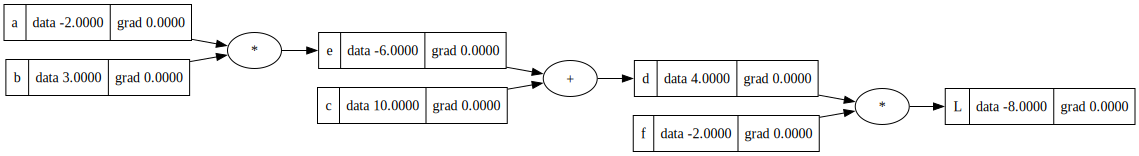

In [15]:
draw_dot(L)

Here the value of a is slightly bumped by h to find the derivative of L with respect to 'a'\
if we do the same with L ie.L+h the derivative would be 1 , indicating base case

In [24]:
def test():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f= Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data
    
    a = Value(2.0 + h , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f= Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data
    
    print((L2-L1)/h)
    
test()

6.000000000000227


In [25]:
L.grad = 1

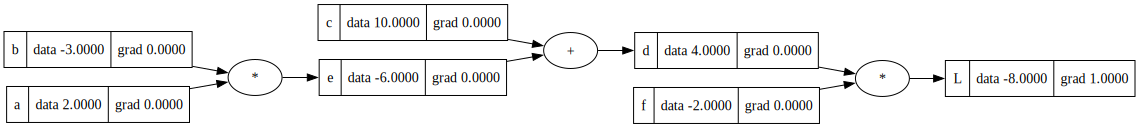

In [26]:
draw_dot(L)

to find the gradient of d, we need to find dL/dd \
L = d * f\
the derivarive is (f(x+h)-f(x))/h\
so we bump d by h\
((d+h)*f (d*f))/h\
to calculate derivative\
d*f + h*f - d*f / h (the d*f cancel out each other)\
h*f/h\
f\
so the gradient of d is the value of 'f' and vice versa


to confirm this we can nudge the value of f to see if the derivative is the value of d

In [29]:
def test():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f= Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data
    
    a = Value(2.0 , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f= Value(-2.0 + h, label='f')
    L = d*f; L.label='L'
    L2 = L.data
    
    print((L2-L1)/h)
    
test()

3.9999999999995595


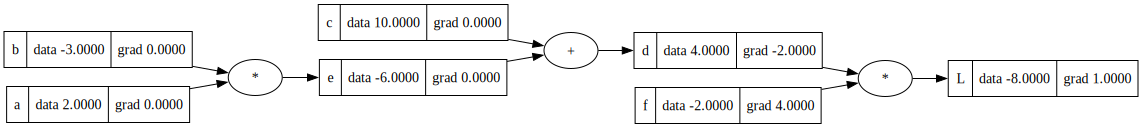

In [28]:
d.grad = -2.0
f.grad = 4.0
draw_dot(L)

now onto finding dd/dc\
d = c + e\
nudging c a little\
(c+h)+e - (c+e)/h\
c + h + e - c - e / h\
h/h\
1.0\
dd/dc = 1.0\
likewise dd/de = 1.0


The chain rule may also be expressed in Leibniz's notation. If a variable L depends on the variable d, which itself depends on the variable c, then L depends on c as well, via the intermediate variable d. In this case, the chain rule is expressed as
$$\frac{dL}{dc} = \frac{dL}{dd} \cdot \frac{dd}{dc}$$


dd/dc = 1.0\
dd/de = 1.0

want dL/dc = (dL/dd) * (dd/dc)

dL\dd = -2.0\
dd\dc = 1.0

so dL\dc = -2.0\
by symmetric rule dL\de = -2.0


so if c and e are nudged it will affect the L(loss) negative 2 times

In [30]:
def test():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f= Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data
    
    a = Value(2.0 , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0 + h, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f= Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data
    
    print((L2-L1)/h)
    
test()

-1.9999999999988916


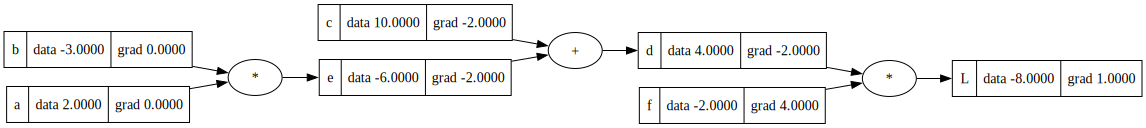

In [31]:
c.grad = -2.0
e.grad = -2.0
draw_dot(L)

to find the gradients of last(first) layer\
dL/da = ?\
dL/da = (dL/de) * (de/da)\
dl/de = -2.0\
de/da = -3.0\
de/db = 2

so (dL/de) * (de/da) = -2.0 * -3.0 = 6.0\
 (dL/de) * (de/db) = -2.0 * 2.0 = -4.0

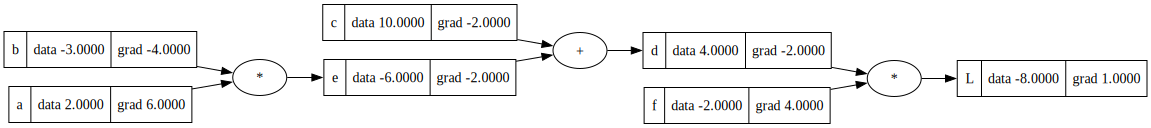

In [32]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0
draw_dot(L)

In [40]:
def test():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f= Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data
    
    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f= Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data
    
    print((L2-L1)/h)
    
test()

6.000000000000227


These paramaters are adjusted inorder to reduce L closer to zero(to make it converge at a global minima)

In [ ]:
a.data += 0.1 * a.grad
b.data += 0.1 * b.grad
c.data += 0.1 * c.grad
f.data += 0.1 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

0.9542400000004823
